In [14]:
import os
import numpy as np
import pandas as pd

In [15]:
# Paths
data_dir = 'data/'
pos_train_path = os.path.join(data_dir, "train_pos_full.txt")
neg_train_path = os.path.join(data_dir, "train_neg_full.txt")
test_path = os.path.join(data_dir, "test_data.txt")

In [16]:
# Load the data
with open(pos_train_path, 'r', encoding='utf-8') as f:
    pos_tweets = f.read().splitlines()

with open(neg_train_path, 'r', encoding='utf-8') as f:
    neg_tweets = f.read().splitlines()

with open(test_path, 'r', encoding='utf-8') as f:
    test_tweets = f.read().splitlines()

# Convert to DataFrames
pos_df = pd.DataFrame({'tweet': pos_tweets, 'label': 1})
neg_df = pd.DataFrame({'tweet': neg_tweets, 'label': 0})
test_df = pd.DataFrame({'tweet': test_tweets})

# Combine datasets
train_df = pd.concat([pos_df, neg_df], ignore_index=True)

### 1. Check for Missing values in our data

In [19]:
print("Missing values in train_df:")
print(train_df.isnull().sum())


Missing values in train_df:
tweet    0
label    0
dtype: int64


### 2. Check our label distribution, to see if we have imbalanced class

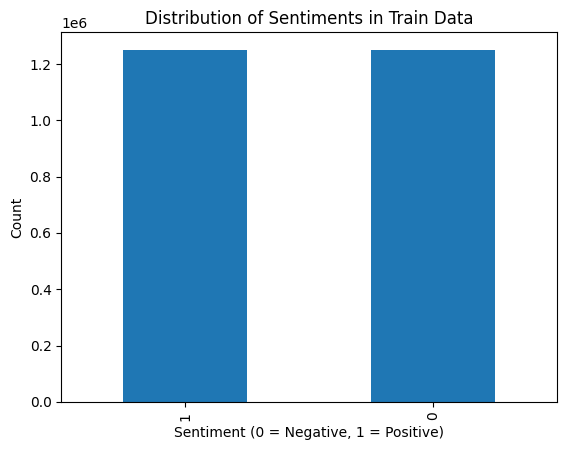

In [21]:
import matplotlib.pyplot as plt

# Distribution of labels in train data
train_df['label'].value_counts().plot(kind='bar')
plt.title("Distribution of Sentiments in Train Data")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()


### 3. Text length Analysis

In [22]:
# Add length column
train_df['tweet_length'] = train_df['tweet'].apply(len)
test_df['tweet_length'] = test_df['tweet'].apply(len)

# Summary statistics
print("Tweet Length Summary (Train):")
print(train_df['tweet_length'].describe())

print("\nTweet Length Summary (Test):")
print(test_df['tweet_length'].describe())


Tweet Length Summary (Train):
count    2.500000e+06
mean     7.596408e+01
std      3.542579e+01
min      3.000000e+00
25%      4.600000e+01
50%      7.100000e+01
75%      1.110000e+02
max      4.010000e+02
Name: tweet_length, dtype: float64

Tweet Length Summary (Test):
count    10000.000000
mean        80.729700
std         34.931852
min         15.000000
25%         51.000000
50%         75.000000
75%        115.000000
max        176.000000
Name: tweet_length, dtype: float64


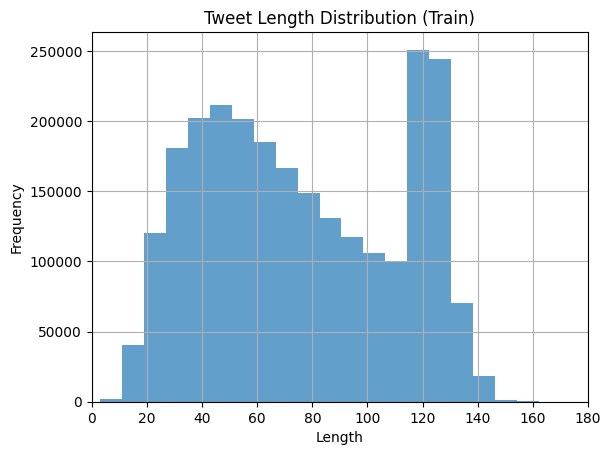

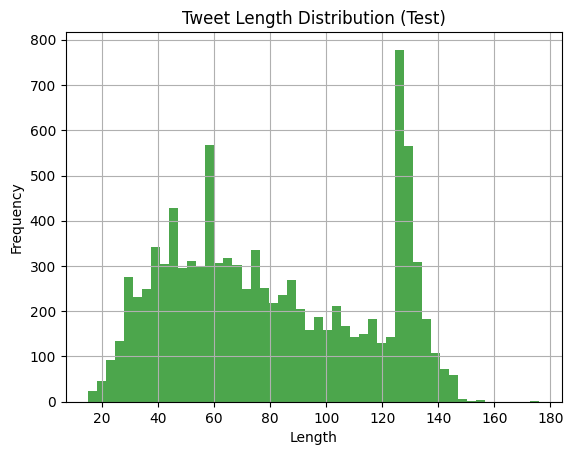

In [32]:
# Train Data
train_df['tweet_length'].hist(bins=50, alpha=0.7)
plt.title("Tweet Length Distribution (Train)")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.xlim(0,180)
plt.show()

# Test Data
test_df['tweet_length'].hist(bins=50, alpha=0.7, color='green')
plt.title("Tweet Length Distribution (Test)")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()


### 4. Common word Analysis

In [24]:
import re
from collections import Counter

# Tokenization function
def clean_tokenize(tweet):
    tweet = re.sub(r'http\S+|www\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)           # Remove mentions
    tweet = re.sub(r'#', '', tweet)              # Remove hashtags symbol
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)    # Remove special characters
    return tweet.lower().split()

# Tokenize tweets
train_df['tokens'] = train_df['tweet'].apply(clean_tokenize)
test_df['tokens'] = test_df['tweet'].apply(clean_tokenize)


In [25]:
# Combine all tokens
all_tokens = [word for tokens in train_df['tokens'] for word in tokens]
word_freq = Counter(all_tokens)

# Display most common words
print("Most Common Words in Train Data:")
print(word_freq.most_common(20))


Most Common Words in Train Data:
[('user', 1606134), ('i', 994731), ('the', 761415), ('to', 703778), ('you', 601312), ('a', 528264), ('url', 526990), ('and', 456764), ('my', 401559), ('me', 342903), ('of', 339896), ('is', 311301), ('for', 306254), ('in', 297817), ('it', 279276), ('im', 229656), ('this', 223226), ('on', 204295), ('with', 201666), ('that', 201447)]


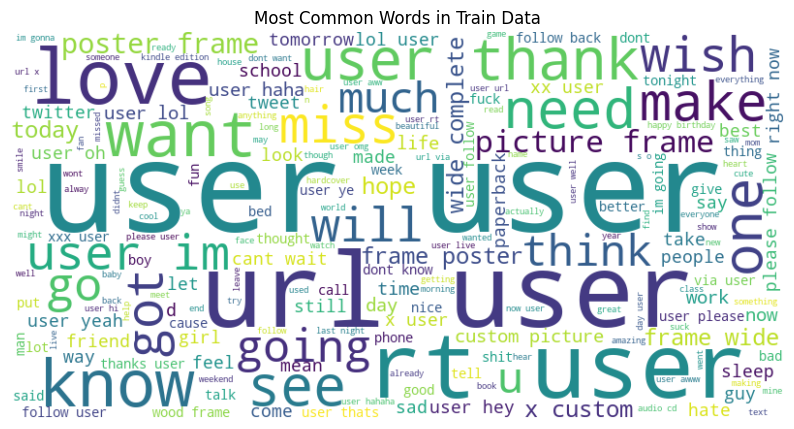

In [27]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Train Data")
plt.show()


### 5. Hashtag analysis

In [ ]:
# Extract hashtags
train_df['hashtags'] = train_df['tweet'].apply(lambda x: re.findall(r'#\w+', x))
test_df['hashtags'] = test_df['tweet'].apply(lambda x: re.findall(r'#\w+', x))

# Analyze hashtags
all_hashtags = [hashtag for hashtags in train_df['hashtags'] for hashtag in hashtags]
hashtag_freq = Counter(all_hashtags)
print("Most Common Hashtags:")
print(hashtag_freq.most_common(10))


Most Common Hashtags:
[('#oomf', 4693), ('#ff', 4449), ('#yougetmajorpointsif', 3380), ('#teamfollowback', 2208), ('#thoughtsduringschool', 1811), ('#sadtweet', 1790), ('#smartnokialumia', 1651), ('#waystomakemehappy', 1513), ('#jobs', 1237), ('#np', 1204)]
Most Common Mentions:
[]


### 6. Sentimental Analysis

In [29]:
# Separate positive and negative tweets
positive_tweets = train_df[train_df['label'] == 1]['tokens']
negative_tweets = train_df[train_df['label'] == 0]['tokens']

# Flatten lists
positive_words = [word for tokens in positive_tweets for word in tokens]
negative_words = [word for tokens in negative_tweets for word in tokens]

# Most common words
positive_freq = Counter(positive_words).most_common(20)
negative_freq = Counter(negative_words).most_common(20)

print("Most Common Positive Words:")
print(positive_freq)

print("\nMost Common Negative Words:")
print(negative_freq)


Most Common Positive Words:
[('user', 1027345), ('i', 456109), ('you', 400539), ('to', 346783), ('the', 327241), ('a', 267133), ('and', 214000), ('my', 202973), ('me', 183609), ('for', 157637), ('it', 156378), ('is', 131282), ('in', 128629), ('of', 119409), ('im', 117499), ('on', 111585), ('that', 111453), ('be', 104515), ('so', 99368), ('url', 98958)]

Most Common Negative Words:
[('user', 578789), ('i', 538622), ('the', 434174), ('url', 428032), ('to', 356995), ('a', 261131), ('and', 242764), ('of', 220487), ('you', 200773), ('my', 198586), ('is', 180019), ('in', 169188), ('me', 159294), ('for', 148617), ('this', 139076), ('it', 122898), ('im', 112157), ('with', 107035), ('frame', 102308), ('so', 101736)]


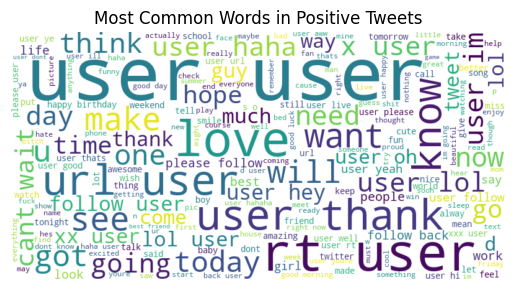

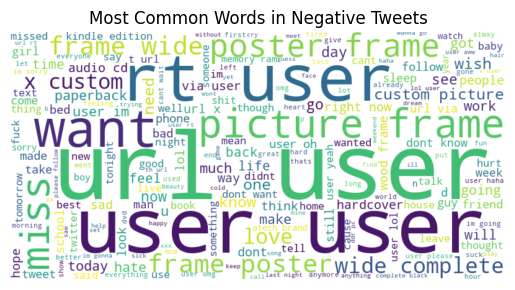

In [30]:
# Positive Word Cloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Positive Tweets")
plt.show()

# Negative Word Cloud
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Negative Tweets")
plt.show()


### 7. N-gram Analysis

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# Bi-gram analysis
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)
X_bigrams = vectorizer.fit_transform(train_df['tweet'])
bigram_freq = dict(zip(vectorizer.get_feature_names_out(), X_bigrams.toarray().sum(axis=0)))
print("Most Common Bi-Grams:")
print(sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True))

# Tri-gram analysis
vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=20)
X_trigrams = vectorizer.fit_transform(train_df['tweet'])
trigram_freq = dict(zip(vectorizer.get_feature_names_out(), X_trigrams.toarray().sum(axis=0)))
print("Most Common Tri-Grams:")
print(sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True))


Most Common Bi-Grams:
[('user user', 209571), ('rt user', 110560), ('in the', 61143), ('of the', 47670), ('to be', 40601), ('for the', 40209), ('going to', 36656), ('if you', 36364), ('you re', 35392), ('user you', 34614), ('follow me', 33833), ('to the', 33046), ('on the', 32764), ('thank you', 31816), ('want to', 31404), ('love you', 30436), ('have to', 28150), ('user thanks', 27995), ('to go', 27383), ('to see', 27195)]
Most Common Tri-Grams:
[('user user user', 68765), ('frame poster frame', 25407), ('picture frame poster', 25404), ('custom picture frame', 24002), ('this frame is', 23693), ('rt user user', 20756), ('poster frame wide', 11833), ('frame wide complete', 11507), ('user thank you', 10450), ('url via user', 9094), ('please follow me', 8854), ('can wait to', 8455), ('user thanks for', 8203), ('user live on', 8054), ('live on url', 8045), ('thanks for the', 7964), ('to go to', 7852), ('to see you', 7224), ('rt if you', 7168), ('user rt user', 6886)]
